<a href="https://colab.research.google.com/github/jacob-jones23/MAT-422/blob/main/4_2_Spectral_Graph_Bipartitioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**4.2 Spectral Graph Bipartitioning**
Graph partition aims to find out a partition such that the cut (the total number of edges between two disjoint sets of nodes) is minimized. For a weighted graph *G* = (*V,E*), given a bipartition of V into disjoint *V$_{1}$* and *V$_{2}$* (*V$_{1}$ ∪ V$_{2}$* = *V*), the cut between them can be defined as
\begin{align}
cut(V_1,V_2) = \sum_{i∈V_{1},j∈V_2}M_{ij}
\end{align}

The definition of cut is easily extended to *k* vertex subsets
\begin{align}
cut(V_1,V_2,....V_k) = \sum_{i<j}cut(V_i,V_j)
\end{align}

The classical graph bipartitioning problem is to find nearly equally-sized vertex subset *V$_{1}$, V$_{2}$* of V such that cut(*V$_{1}$*, *V$_{2}$*) = min$_{V_{1},V_{2}}$ cut (*V$_{1}$, V$_{2}$*). For this purpose, let us define the partition vector **p** that captures this division.
\begin{align}
p_i = \left\{
\begin{array}{cl}
+1 & i ∈ V_1, \\
-1 & i ∈ V_2.
\end{array}
\right.
\end{align}

In [ ]:
import numpy as np
import scipy
import pandas as pd
from itertools import cycle
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [ ]:
# From Laplacian to Clustering

def laplacian(A):
  D = np.zeros(A.shape)
  w = np.sum(A, axis=0)
  D.flat[::len(w) + 1] = w ** (-0.5) # set the diagonal of D to w
  return D.dot(A).dot(D)

def k_means(X, n_clusters):
  kmeans = KMeans(n_clusters = n_clusters, random_state=1231)
  return kmeans.fit(X).labels_

def spectral_clustering(affinity, n_clusters, cluster_method=k_means):
  L = laplacian(affinity)
  eig_val, eig_vect = scipy.sparse.linalg.eigs(L, n_clusters)
  X = eig_vect.real
  rows_norm = np.linalg.norm(X, axis=1, ord=2)
  Y = (X.T / rows_norm).T
  labels = cluster_method(Y, n_clusters)
  return labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


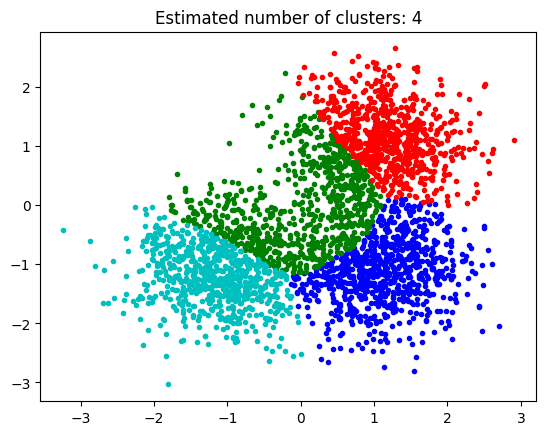

In [ ]:
# Use sklearn Functions
# Center for generating random data.
centers = [[1,1], [-1, -1], [1, -1]]

# The number of data generated.
n_samples = 3000

# Generate data.
X, lables_true = make_blobs(n_samples=n_samples, centers= centers, cluster_std=0.6,
                  random_state =0)

# Transform to a matrix, the input has to be symmetric.
metrics_metrix = (-1 * metrics.pairwise.pairwise_distances(X)).astype(np.int32)
metrics_metrix += -1 * metrics_metrix.min()

# Set spectral clustering function.
n_clusters_= 4
lables = spectral_clustering(metrics_metrix,n_clusters=n_clusters_)

# Visulization of results
plt.figure(1)
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    # Reassembles an array of True and False based on whether the values in lables are equal to k.
    my_members = lables == k
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

**Kaggle Credit Card Dataset**

Downloaded from https://www.kaggle.com/datasets/arjunbhasin2013/ccdata


In [ ]:
# Load the data
X = pd.read_csv('/content/CC GENERAL.csv')

# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis = 1)

# Handling the missing values if any
X.fillna(method ='ffill', inplace = True)

X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Preprocessing the data to make it visualizable

# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the Data
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

X_principal.head()

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544826
2,0.330634,0.268881
3,-0.481658,-0.097618
4,-0.563511,-0.482504


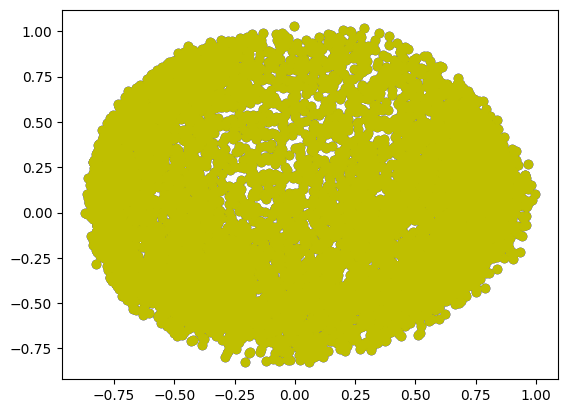

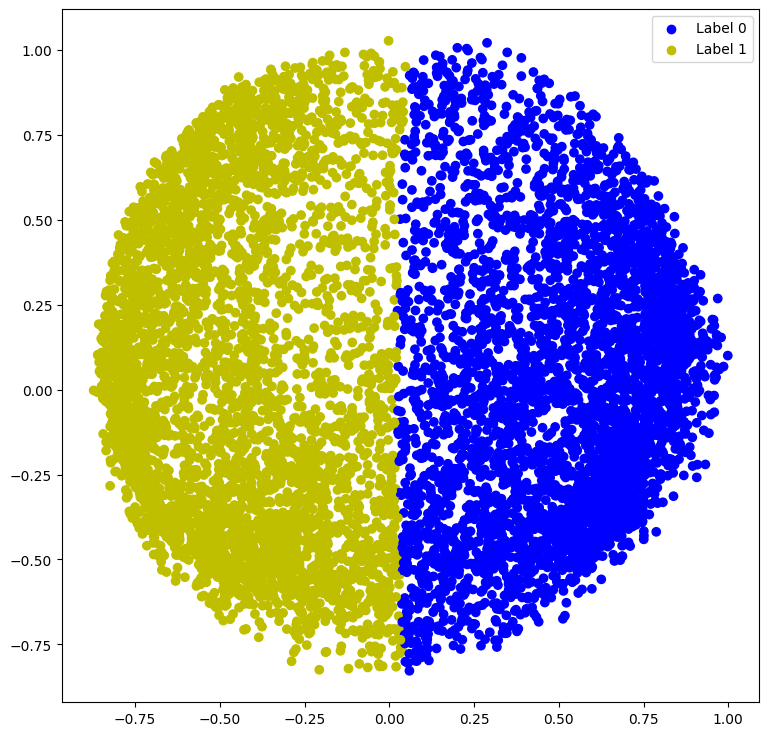

In [ ]:
# Build the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')

# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]

# Plotting the clustered scatter plot

b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');

plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

In [ ]:
# Building the clustering model
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')

# Training the model and Storing the predicted cluster labels
labels_nn = spectral_model_nn.fit_predict(X_principal)

In [ ]:
# List of different values of affinity
affinity = ['rbf', 'nearest-neighbours']

# List of Silhouette Scores
s_scores = []

# Evaluating the performance
s_scores.append(silhouette_score(X, labels_rbf))
s_scores.append(silhouette_score(X, labels_nn))

print(s_scores)

[0.05300611480757429, 0.05667039590382262]


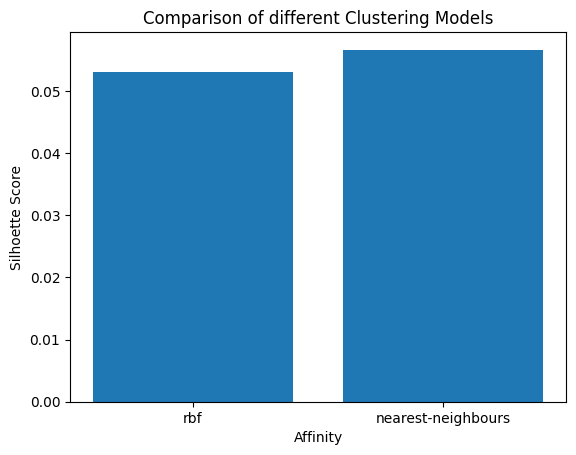

In [ ]:
# Plotting a Bar Graph to compare the models
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhoette Score')
plt.title('Comparison of different Clustering Models')
plt.show()

**Lemma 4.2.1**: Given the Laplacian matrix L of G and a partition vector **p**, the Rayleigh Quotient
\begin{align}
\frac{\mathbf{p}^TL\mathbf{p}}{\mathbf{p}^T\mathbf{p}} = \frac{1}{n}*4cut(V_1,V_2)
\end{align}

**Theorem 4.2.2**: The serialized partition vector **q** = (q$_{i}$)

\begin{align}
q_i = \left\{
\begin{array}{cl}
+\sqrt{\frac{V_1}{V_2}} & i ∈ V_1, \\
-\sqrt{\frac{V_1}{V_2}} & i ∈ V_2.
\end{array}
\right.
\end{align}

satisfies

1.
\begin{align}
\mathbf{q}^TW\mathbf{e}=0, \mathbf{q}^TW\mathbf{q} = v_1 + v_2.
\end{align}

2.
\begin{align}
\frac{\mathbf{q}^TL\mathbf{q}}{\mathbf{q}^TW\mathbf{q}}
\end{align}

3. The problem
\begin{align}
min_{q != 0}\frac{\mathbf{q}^TL\mathbf{q}}{\mathbf{q}^TW\mathbf{q}}, \text{subject to } \mathbf{q}^{T}W\mathbf{e} = 0,
\end{align}
is solves when **q** is the eigenvector correspoinding to the second smallest eigenvalue λ$_{2}$ of the generalized eigenvalue problem,
\begin{align}
L\mathbf{x}=λW\mathbf{x}
\end{align}

